# US (Amerika Serikat)

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [10]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/us.csv')
type(df)

pandas.core.frame.DataFrame

In [11]:
df.shape

(41, 5)

In [12]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [13]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,15,0,0,12
2020-02-16,15,0,0,12
2020-02-17,15,0,0,12
2020-02-18,15,0,0,12
2020-02-19,15,0,0,12
2020-02-20,15,0,0,10
2020-02-21,35,20,0,29
2020-02-22,35,0,0,29
2020-02-23,35,0,0,28


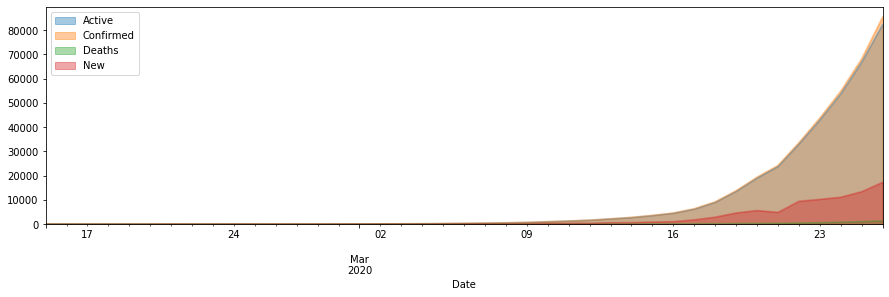

In [14]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)

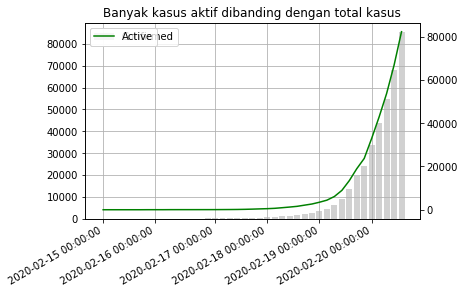

In [15]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

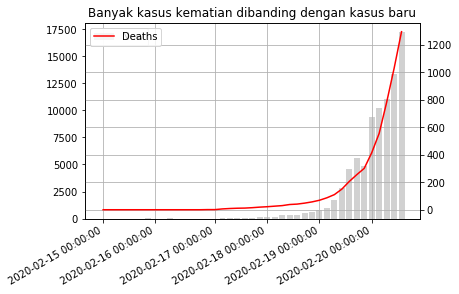

In [16]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 15-Feb-2020
- End: 26-Mar-2020
- Range: 41 Days

**Data**

In [17]:
y = np.array ((12, 12, 12, 12, 12, 10, 29, 29, 28, 48, 51, 54, 54, 57, 60, 65, 85, 106, 138, 200, 289, 401, 504, 663, 949, 1248, 1581, 2126, 2664, 3484, 4434, 6127, 8940, 13464, 18965, 23720, 33000, 42930, 53697, 66790, 82272))
y = y.astype('float64')
y

array([1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.0000e+01, 2.9000e+01, 2.9000e+01, 2.8000e+01, 4.8000e+01,
       5.1000e+01, 5.4000e+01, 5.4000e+01, 5.7000e+01, 6.0000e+01,
       6.5000e+01, 8.5000e+01, 1.0600e+02, 1.3800e+02, 2.0000e+02,
       2.8900e+02, 4.0100e+02, 5.0400e+02, 6.6300e+02, 9.4900e+02,
       1.2480e+03, 1.5810e+03, 2.1260e+03, 2.6640e+03, 3.4840e+03,
       4.4340e+03, 6.1270e+03, 8.9400e+03, 1.3464e+04, 1.8965e+04,
       2.3720e+04, 3.3000e+04, 4.2930e+04, 5.3697e+04, 6.6790e+04,
       8.2272e+04])

In [18]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

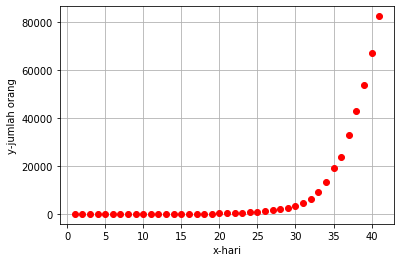

In [19]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [20]:
y = np.array ((12, 12, 12, 12, 12, 10, 29, 29, 28, 48, 51, 54, 54, 57, 60, 65, 85, 106, 138, 200, 289, 401, 504, 663, 949, 1248, 1581, 2126, 2664, 3484, 4434, 6127, 8940, 13464, 18965, 23720, 33000, 42930, 53697, 66790, 82272))
y = y.astype('float64')
y

array([1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.0000e+01, 2.9000e+01, 2.9000e+01, 2.8000e+01, 4.8000e+01,
       5.1000e+01, 5.4000e+01, 5.4000e+01, 5.7000e+01, 6.0000e+01,
       6.5000e+01, 8.5000e+01, 1.0600e+02, 1.3800e+02, 2.0000e+02,
       2.8900e+02, 4.0100e+02, 5.0400e+02, 6.6300e+02, 9.4900e+02,
       1.2480e+03, 1.5810e+03, 2.1260e+03, 2.6640e+03, 3.4840e+03,
       4.4340e+03, 6.1270e+03, 8.9400e+03, 1.3464e+04, 1.8965e+04,
       2.3720e+04, 3.3000e+04, 4.2930e+04, 5.3697e+04, 6.6790e+04,
       8.2272e+04])

In [21]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

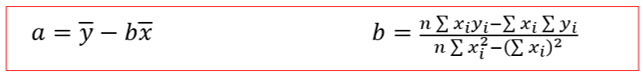

**Membuat xreg untuk plotting selanjutnya**

In [22]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

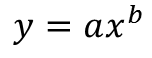

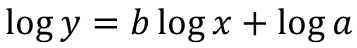

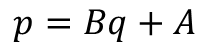

In [23]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [24]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [25]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.7828q -0.6954


**Kembalikan ke bentuk pangkat**

In [26]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.2017x^(2.7828)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [27]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.8475 dan r^2 = 0.7182


**Plot**

In [28]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([2.01662186e-01, 2.62914114e-01, 3.34945088e-01, 4.18515138e-01,
       5.14370626e-01, 6.23245526e-01, 7.45862489e-01, 8.82933763e-01,
       1.03516198e+00, 1.20324084e+00, 1.38785573e+00, 1.58968421e+00,
       1.80939653e+00, 2.04765606e+00, 2.30511961e+00, 2.58243785e+00,
       2.88025555e+00, 3.19921194e+00, 3.53994090e+00, 3.90307124e+00,
       4.28922690e+00, 4.69902718e+00, 5.13308691e+00, 5.59201661e+00,
       6.07642268e+00, 6.58690754e+00, 7.12406978e+00, 7.68850427e+00,
       8.28080232e+00, 8.90155177e+00, 9.55133711e+00, 1.02307396e+01,
       1.09403373e+01, 1.16807052e+01, 1.24524155e+01, 1.32560374e+01,
       1.40921372e+01, 1.49612785e+01, 1.58640225e+01, 1.68009275e+01,
       1.77725494e+01, 1.87794416e+01, 1.98221553e+01, 2.09012391e+01,
       2.20172394e+01, 2.31707004e+01, 2.43621640e+01, 2.55921703e+01,
       2.68612568e+01, 2.81699595e+01, 2.95188118e+01, 3.09083458e+01,
       3.23390911e+01, 3.38115757e+01, 3.53263257e+01, 3.68838655e+01,
      

Text(0, 0.5, 'y-banyak orang')

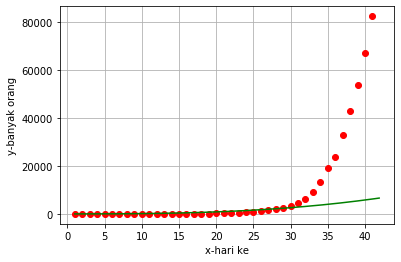

In [29]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

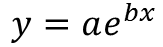

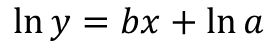

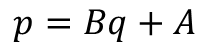

**Linearisasi**

In [30]:
y = np.array ((12, 12, 12, 12, 12, 10, 29, 29, 28, 48, 51, 54, 54, 57, 60, 65, 85, 106, 138, 200, 289, 401, 504, 663, 949, 1248, 1581, 2126, 2664, 3484, 4434, 6127, 8940, 13464, 18965, 23720, 33000, 42930, 53697, 66790, 82272))
y = y.astype('float64')
y

array([1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.0000e+01, 2.9000e+01, 2.9000e+01, 2.8000e+01, 4.8000e+01,
       5.1000e+01, 5.4000e+01, 5.4000e+01, 5.7000e+01, 6.0000e+01,
       6.5000e+01, 8.5000e+01, 1.0600e+02, 1.3800e+02, 2.0000e+02,
       2.8900e+02, 4.0100e+02, 5.0400e+02, 6.6300e+02, 9.4900e+02,
       1.2480e+03, 1.5810e+03, 2.1260e+03, 2.6640e+03, 3.4840e+03,
       4.4340e+03, 6.1270e+03, 8.9400e+03, 1.3464e+04, 1.8965e+04,
       2.3720e+04, 3.3000e+04, 4.2930e+04, 5.3697e+04, 6.6790e+04,
       8.2272e+04])

In [31]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

In [32]:
p = np.log(y)
q = x

**Hitung regresi linear**

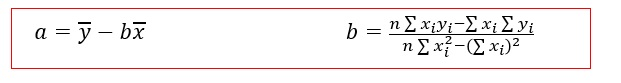

In [33]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [34]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2367q + 1.1674


**Hitung kembali dalam bentuk bilangan berpangkat**

In [35]:
a = np.e**A
b = B

In [36]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 3.2136x^(0.2367)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [37]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9867 dan r^2 = 0.9736


**Plot data dan regresinya**

In [38]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [39]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([3.21362540e+00, 3.29061071e+00, 3.36944028e+00, 3.45015828e+00,
       3.53280995e+00, 3.61744162e+00, 3.70410071e+00, 3.79283581e+00,
       3.88369663e+00, 3.97673411e+00, 4.07200038e+00, 4.16954884e+00,
       4.26943417e+00, 4.37171234e+00, 4.47644068e+00, 4.58367787e+00,
       4.69348404e+00, 4.80592070e+00, 4.92105090e+00, 5.03893913e+00,
       5.15965149e+00, 5.28325563e+00, 5.40982081e+00, 5.53941798e+00,
       5.67211976e+00, 5.80800053e+00, 5.94713646e+00, 6.08960551e+00,
       6.23548753e+00, 6.38486429e+00, 6.53781951e+00, 6.69443891e+00,
       6.85481027e+00, 7.01902347e+00, 7.18717054e+00, 7.35934573e+00,
       7.53564554e+00, 7.71616877e+00, 7.90101659e+00, 8.09029261e+00,
       8.28410291e+00, 8.48255611e+00, 8.68576344e+00, 8.89383879e+00,
       9.10689876e+00, 9.32506279e+00, 9.54845313e+00, 9.77719498e+00,
       1.00114166e+01, 1.02512491e+01, 1.04968271e+01, 1.07482881e+01,
       1.10057731e+01, 1.12694264e+01, 1.15393957e+01, 1.18158324e+01,
      

Text(0, 0.5, 'y-banyak orang')

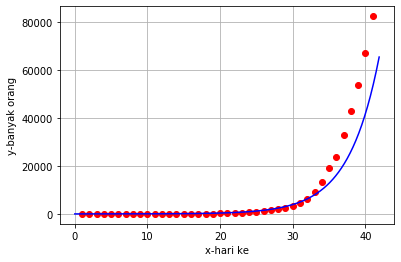

In [40]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [41]:
y = np.array ((12, 12, 12, 12, 12, 10, 29, 29, 28, 48, 51, 54, 54, 57, 60, 65, 85, 106, 138, 200, 289, 401, 504, 663, 949, 1248, 1581, 2126, 2664, 3484, 4434, 6127, 8940, 13464, 18965, 23720, 33000, 42930, 53697, 66790, 82272))
y = y.astype('float64')
y

array([1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.0000e+01, 2.9000e+01, 2.9000e+01, 2.8000e+01, 4.8000e+01,
       5.1000e+01, 5.4000e+01, 5.4000e+01, 5.7000e+01, 6.0000e+01,
       6.5000e+01, 8.5000e+01, 1.0600e+02, 1.3800e+02, 2.0000e+02,
       2.8900e+02, 4.0100e+02, 5.0400e+02, 6.6300e+02, 9.4900e+02,
       1.2480e+03, 1.5810e+03, 2.1260e+03, 2.6640e+03, 3.4840e+03,
       4.4340e+03, 6.1270e+03, 8.9400e+03, 1.3464e+04, 1.8965e+04,
       2.3720e+04, 3.3000e+04, 4.2930e+04, 5.3697e+04, 6.6790e+04,
       8.2272e+04])

In [42]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

**Membentuk regresi polinomial dari matriks**

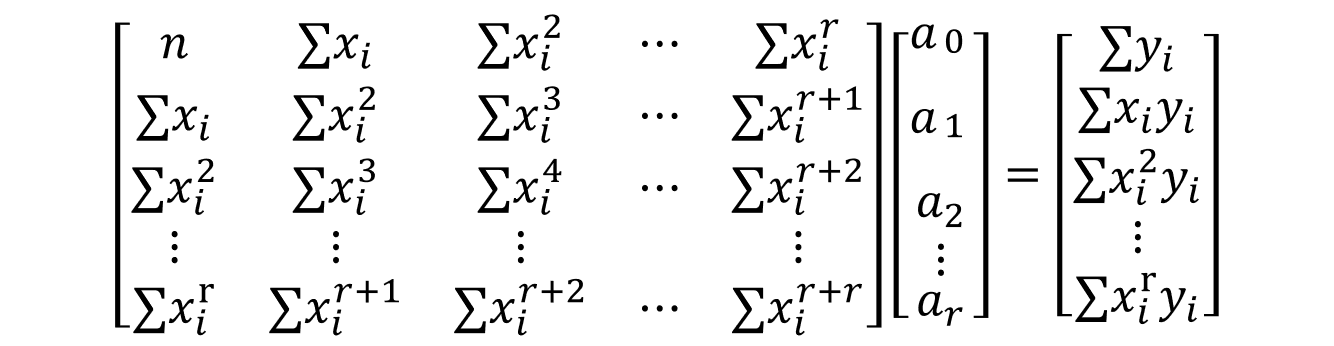

**Mendefinisikan elemen-elemen matriks kiri**

In [43]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[4.10000000e+01, 8.61000000e+02, 2.38210000e+04, 7.41321000e+05],
       [8.61000000e+02, 2.38210000e+04, 7.41321000e+05, 2.46070930e+07],
       [2.38210000e+04, 7.41321000e+05, 2.46070930e+07, 8.50789401e+08],
       [7.41321000e+05, 2.46070930e+07, 8.50789401e+08, 3.02550079e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [44]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[3.69322000e+05],
       [1.39938740e+07],
       [5.34679344e+08],
       [2.05608394e+10]])

**Invers matriks sisi kiri**

In [45]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 4.71264935e-01, -8.50613871e-02,  4.09795596e-03,
        -5.76017906e-05],
       [-8.50613871e-02,  1.95585587e-02, -1.04382586e-03,
         1.55298092e-05],
       [ 4.09795596e-03, -1.04382586e-03,  5.90991836e-05,
        -9.13347631e-07],
       [-5.76017906e-05,  1.55298092e-05, -9.13347631e-07,
         1.44975814e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [46]:
Y = Ainv.dot(B)
print(Y)

[[-9.53858349e+03]
 [ 3.47874971e+03]
 [-2.73783506e+02]
 [ 5.78291632e+00]]


In [47]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [48]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 5.7829x^3 + -273.7835X^2 + 3478.7497x + -9538.5835


In [49]:
y

array([1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01,
       1.0000e+01, 2.9000e+01, 2.9000e+01, 2.8000e+01, 4.8000e+01,
       5.1000e+01, 5.4000e+01, 5.4000e+01, 5.7000e+01, 6.0000e+01,
       6.5000e+01, 8.5000e+01, 1.0600e+02, 1.3800e+02, 2.0000e+02,
       2.8900e+02, 4.0100e+02, 5.0400e+02, 6.6300e+02, 9.4900e+02,
       1.2480e+03, 1.5810e+03, 2.1260e+03, 2.6640e+03, 3.4840e+03,
       4.4340e+03, 6.1270e+03, 8.9400e+03, 1.3464e+04, 1.8965e+04,
       2.3720e+04, 3.3000e+04, 4.2930e+04, 5.3697e+04, 6.6790e+04,
       8.2272e+04])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [50]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9784 dan r^2 = 0.9736


**Plot**

Text(0, 0.5, 'y')

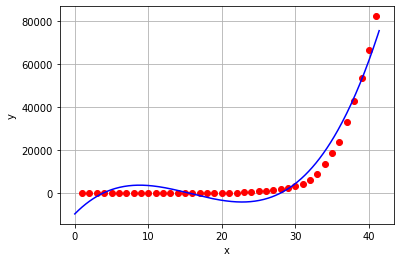

In [51]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

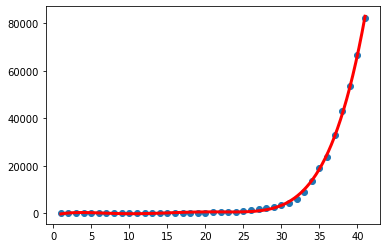

In [52]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [53]:
print (regpoly)

          5          4        3         2
0.008841 x - 0.6478 x + 17.1 x - 192.2 x + 848 x - 982.4


In [54]:
print(r2_score(y, regpoly(x)))

0.9994212939064825


**Selesai**

### Total Death

- Start: 29-Feb-2020
- End: 26-Mar-2020
- Range: 27 Days

**Data**

In [55]:
y = np.array ((1, 1, 6, 9, 11, 12, 15, 19, 22, 26, 30, 38, 41, 48, 57, 69, 87, 110, 150, 206, 255, 301, 414, 555, 780, 1027, 1295))
y = y.astype('float64')
y

array([1.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 1.200e+01,
       1.500e+01, 1.900e+01, 2.200e+01, 2.600e+01, 3.000e+01, 3.800e+01,
       4.100e+01, 4.800e+01, 5.700e+01, 6.900e+01, 8.700e+01, 1.100e+02,
       1.500e+02, 2.060e+02, 2.550e+02, 3.010e+02, 4.140e+02, 5.550e+02,
       7.800e+02, 1.027e+03, 1.295e+03])

In [56]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

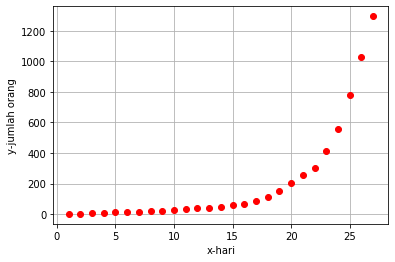

In [57]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [58]:
y = np.array ((1, 1, 6, 9, 11, 12, 15, 19, 22, 26, 30, 38, 41, 48, 57, 69, 87, 110, 150, 206, 255, 301, 414, 555, 780, 1027, 1295))
y = y.astype('float64')
y

array([1.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 1.200e+01,
       1.500e+01, 1.900e+01, 2.200e+01, 2.600e+01, 3.000e+01, 3.800e+01,
       4.100e+01, 4.800e+01, 5.700e+01, 6.900e+01, 8.700e+01, 1.100e+02,
       1.500e+02, 2.060e+02, 2.550e+02, 3.010e+02, 4.140e+02, 5.550e+02,
       7.800e+02, 1.027e+03, 1.295e+03])

In [59]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

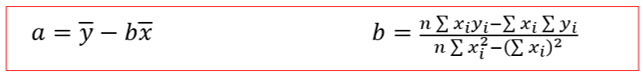

**Membuat xreg untuk plotting selanjutnya**

In [60]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

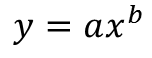

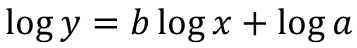

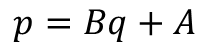

In [61]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [62]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [63]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.1399q -0.4908


**Kembalikan ke bentuk pangkat**

In [64]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.3230x^(2.1399)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [65]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9480 dan r^2 = 0.8986


**Plot**

In [66]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([3.23009412e-01, 3.96086269e-01, 4.77146861e-01, 5.66289047e-01,
       6.63603891e-01, 7.69176611e-01, 8.83087331e-01, 1.00541170e+00,
       1.13622140e+00, 1.27558456e+00, 1.42356615e+00, 1.58022823e+00,
       1.74563026e+00, 1.91982932e+00, 2.10288027e+00, 2.29483598e+00,
       2.49574745e+00, 2.70566395e+00, 2.92463315e+00, 3.15270123e+00,
       3.38991294e+00, 3.63631177e+00, 3.89193994e+00, 4.15683853e+00,
       4.43104754e+00, 4.71460592e+00, 5.00755166e+00, 5.30992183e+00,
       5.62175261e+00, 5.94307935e+00, 6.27393663e+00, 6.61435825e+00,
       6.96437730e+00, 7.32402619e+00, 7.69333667e+00, 8.07233984e+00,
       8.46106623e+00, 8.85954578e+00, 9.26780786e+00, 9.68588133e+00,
       1.01137945e+01, 1.05515753e+01, 1.09992510e+01, 1.14568485e+01,
       1.19243944e+01, 1.24019146e+01, 1.28894348e+01, 1.33869802e+01,
       1.38945757e+01, 1.44122458e+01, 1.49400145e+01, 1.54779057e+01,
       1.60259427e+01, 1.65841487e+01, 1.71525465e+01, 1.77311584e+01,
      

Text(0, 0.5, 'y-banyak orang')

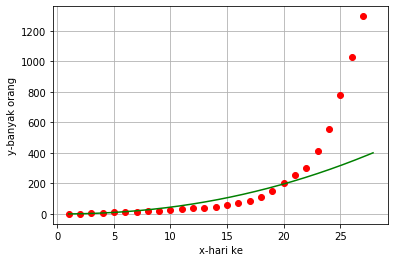

In [67]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

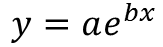

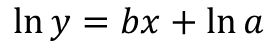

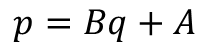

**Linearisasi**

In [68]:
y = np.array ((1, 1, 6, 9, 11, 12, 15, 19, 22, 26, 30, 38, 41, 48, 57, 69, 87, 110, 150, 206, 255, 301, 414, 555, 780, 1027, 1295))
y = y.astype('float64')
y

array([1.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 1.200e+01,
       1.500e+01, 1.900e+01, 2.200e+01, 2.600e+01, 3.000e+01, 3.800e+01,
       4.100e+01, 4.800e+01, 5.700e+01, 6.900e+01, 8.700e+01, 1.100e+02,
       1.500e+02, 2.060e+02, 2.550e+02, 3.010e+02, 4.140e+02, 5.550e+02,
       7.800e+02, 1.027e+03, 1.295e+03])

In [69]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

In [70]:
p = np.log(y)
q = x

**Hitung regresi linear**

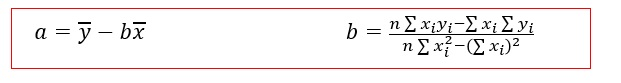

In [71]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [72]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2343q + 0.7062


**Hitung kembali dalam bentuk bilangan berpangkat**

In [73]:
a = np.e**A
b = B

In [74]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 2.0263x^(0.2343)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [75]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9793 dan r^2 = 0.9590


**Plot data dan regresinya**

In [76]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [77]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([   2.02626983,    2.07430559,    2.12348012,    2.1738204 ,
          2.22535407,    2.27810943,    2.33211543,    2.38740172,
          2.44399866,    2.50193731,    2.56124949,    2.62196775,
          2.68412542,    2.74775664,    2.81289633,    2.87958026,
          2.94784503,    3.01772811,    3.08926788,    3.16250361,
          3.2374755 ,    3.31422471,    3.39279338,    3.47322463,
          3.55556263,    3.63985257,    3.72614074,    3.81447449,
          3.90490233,    3.99747389,    4.09224001,    4.18925269,
          4.28856521,    4.39023208,    4.49430911,    4.60085345,
          4.70992358,    4.82157938,    4.93588215,    5.05289464,
          5.17268108,    5.29530725,    5.42084044,    5.5493496 ,
          5.68090525,    5.81557963,    5.95344666,    6.09458204,
          6.23906325,    6.3869696 ,    6.53838229,    6.69338445,
          6.85206116,    7.01449955,    7.18078878,    7.35102014,
          7.5252871 ,    7.70368531,    7.88631273,    8.07326

Text(0, 0.5, 'y-banyak orang')

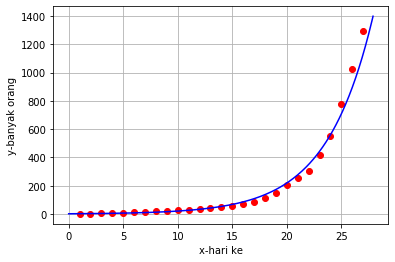

In [78]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [79]:
y = np.array ((1, 1, 6, 9, 11, 12, 15, 19, 22, 26, 30, 38, 41, 48, 57, 69, 87, 110, 150, 206, 255, 301, 414, 555, 780, 1027, 1295))
y = y.astype('float64')
y

array([1.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 1.200e+01,
       1.500e+01, 1.900e+01, 2.200e+01, 2.600e+01, 3.000e+01, 3.800e+01,
       4.100e+01, 4.800e+01, 5.700e+01, 6.900e+01, 8.700e+01, 1.100e+02,
       1.500e+02, 2.060e+02, 2.550e+02, 3.010e+02, 4.140e+02, 5.550e+02,
       7.800e+02, 1.027e+03, 1.295e+03])

In [80]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

**Membentuk regresi polinomial dari matriks**

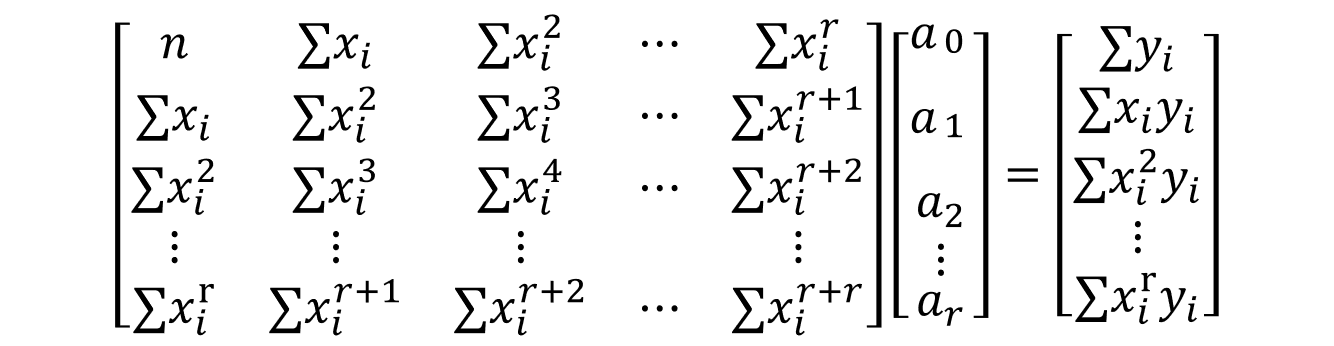

**Mendefinisikan elemen-elemen matriks kiri**

In [81]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[2.70000000e+01, 3.78000000e+02, 6.93000000e+03, 1.42884000e+05],
       [3.78000000e+02, 6.93000000e+03, 1.42884000e+05, 3.14206200e+06],
       [6.93000000e+03, 1.42884000e+05, 3.14206200e+06, 7.19659080e+07],
       [1.42884000e+05, 3.14206200e+06, 7.19659080e+07, 1.69521759e+09]])

**Mendefinisikan elemen-elemen matriks kanan**

In [82]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[5.5850000e+03],
       [1.3126400e+05],
       [3.1831360e+06],
       [7.8613406e+07]])

**Invers matriks sisi kiri**

In [83]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 7.92877493e-01, -2.15622032e-01,  1.56695157e-02,
        -3.32383666e-04],
       [-2.15622032e-01,  7.31260828e-02, -5.84373056e-03,
         1.30715744e-04],
       [ 1.56695157e-02, -5.84373056e-03,  4.94014287e-04,
        -1.14615057e-05],
       [-3.32383666e-04,  1.30715744e-04, -1.14615057e-05,
         2.72892993e-07]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [84]:
Y = Ainv.dot(B)
print(Y)

[[-126.8022792 ]
 [  69.19380751]
 [  -8.07054299]
 [   0.27142483]]


In [85]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [86]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.2714x^3 + -8.0705X^2 + 69.1938x + -126.8023


In [87]:
y

array([1.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 1.200e+01,
       1.500e+01, 1.900e+01, 2.200e+01, 2.600e+01, 3.000e+01, 3.800e+01,
       4.100e+01, 4.800e+01, 5.700e+01, 6.900e+01, 8.700e+01, 1.100e+02,
       1.500e+02, 2.060e+02, 2.550e+02, 3.010e+02, 4.140e+02, 5.550e+02,
       7.800e+02, 1.027e+03, 1.295e+03])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [88]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9907 dan r^2 = 0.9590


**Plot**

Text(0, 0.5, 'y')

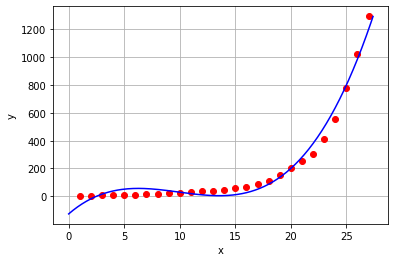

In [89]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

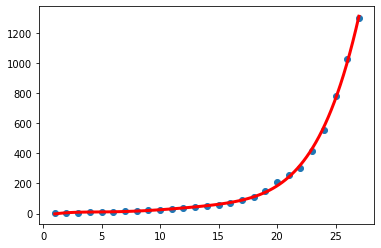

In [90]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [91]:
print (regpoly)

           5           4          3         2
0.0007434 x - 0.03527 x + 0.6404 x - 5.093 x + 18.94 x - 17.21


In [92]:
print(r2_score(y, regpoly(x)))

0.9989363000946645


**Selesai**